## Ajustement des mesures de recharge

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def lecture(fichier):
    a = []
    b = []
    c = []
    with open(fichier,'r') as f:
        for ligne in f:
            ai,bi,ci = [float(val.strip()) for val in ligne.split(';')]
            a.append(ai)
            b.append(bi)
            c.append(ci)
    return a, b, c

def lecture2(fichier):
    a = []
    b = []
    c = []
    with open(fichier,'r') as f:
        for ligne in f:
            ai,bi,ci = [float(val.strip()) for val in ligne.split('\t')]
            a.append(ai)
            b.append(bi)
            c.append(ci)
    return a, b, c

def ajustement(fichier):
    t, exp, moy = lecture(fichier)
    N = []
    T = []
    for i in range (len(t)):
        if np.abs(exp[i]-moy[i]) < 0.03:
            N.append(exp[i])
            T.append(t[i])
    return T, N

def ajustement2(fichier):
    t, exp, moy = lecture2(fichier)
    N = []
    T = []
    for i in range (len(t)):
        if np.abs(exp[i]-moy[i]) < 0.03:
            N.append(exp[i])
            T.append(t[i])
    return T, N

T07, A07 = ajustement("TIPE7mesure07.csv")
T075, A075 = ajustement("TIPE7mesure075.csv")
T081,A081 = ajustement("TIPE7mesure08(1).csv")
T082,A082 = ajustement2("TIPE7mesure08(2).csv")
T085, A085 = ajustement("TIPE7mesure085.csv")
T09, A09 = ajustement("TIPE7mesure09.csv")
T00, A00 = ajustement2("TIPE7mesure00.csv")

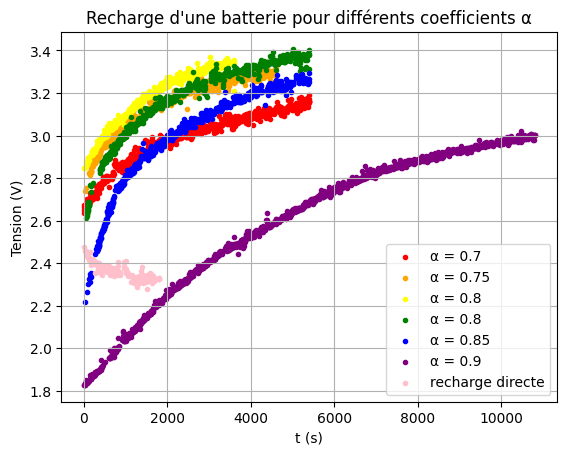

In [3]:

plt.scatter(T07, A07, color ="red", label = "α = 0.7", marker = '.')
plt.scatter(T075, A075, color ="orange", label = "α = 0.75", marker = '.')
plt.scatter(T081, A081, color ="yellow", label = "α = 0.8", marker = '.')
plt.scatter(T082, A082, color ="green", label = "α = 0.8", marker = '.')
plt.scatter(T085, A085, color ="blue", label = "α = 0.85", marker = '.')
plt.scatter(T09, A09, color ="purple", label = "α = 0.9", marker = '.')
plt.scatter(T00, A00, color ="pink", label = "recharge directe", marker = '.')

plt.xlabel("t (s)")
plt.ylabel("Tension (V)")
plt.title("Recharge d'une batterie pour différents coefficients α")
plt.grid()
plt.legend()
plt.show()


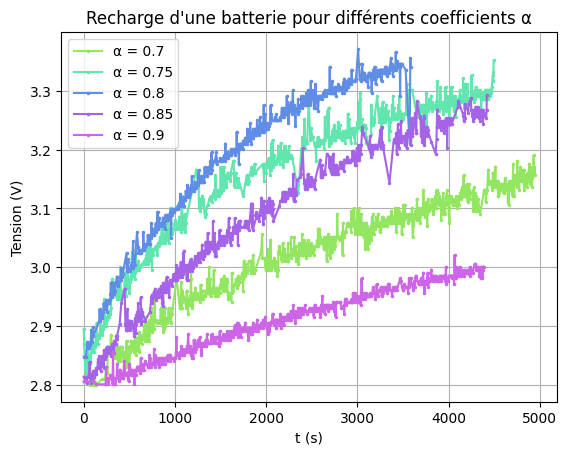

In [4]:
def coupe(T,A):
    seuil = 2.8
    N = []
    T2 = []
    T3 = []
    for i in range (len(A)):
        if A[i]>seuil:
            N.append(A[i])
            T2.append(T[i] - T[0])
    for j in range (len(T2)):
        T3.append(T2[j] - T2[0])
    return T3, N

t07, exp07 = coupe(T07,A07)
t075, exp075 = coupe(T075,A075)
t081, exp081 = coupe(T081, A081)
t082, exp082 = coupe(T082, A082)
t085, exp085 = coupe(T085, A085)
t09, exp09 = coupe(T09, A09)

plt.plot(t07, exp07, color ="#93e660", label = "α = 0.7", marker = '.', markersize = 3)
plt.plot(t075, exp075, color ="#60e6ae", label = "α = 0.75", marker = '.', markersize = 3)
plt.plot(t081, exp081, color ="#608ee6", label = "α = 0.8", marker = '.', markersize = 3)
plt.plot(t085, exp085, color ="#a564e8", label = "α = 0.85", marker = '.', markersize = 3)
plt.plot(t09, exp09, color ="#ce64e8", label = "α = 0.9", marker = '.', markersize = 3)

plt.xlabel("t (s)")
plt.ylabel("Tension (V)")
plt.title("Recharge d'une batterie pour différents coefficients α")
plt.grid()
plt.legend()
plt.show()